<h2 align="center"> Previsões Climáticas: </h2>

<h3 align="center"> O uso de Redes Neurais para identificação da temperatura da superfície marítima no evento climático 'El Niño' </h3>

<h4 align="center"> Ilum - Escola de Ciência | Curso: Redes Neurais (2023) | Ministrada pelo Profº Daniel Cassar  </h4>

<hr>

<p align="justify"> O Código desenvolvido para a matéria de Redes Neurais e Algoritmos Genéticos da Ilum - Escola de Ciência ministrada pelo professor doutor Daniel Roberto Cassar. </p>

<p align="justify"> Desenvolvedores do código: </p>

- Alice Kageyama (220049);
- Haziel Sixto Baden Sanchez Hermoza (220065);
- Monyque Karoline de Paula Silva (220063);
- Pedro Thomazelli Ferreira (220058).



#### **Contextualização**

<p "text-align: justify"> Neste notebook, iremos discorrer a respeito da previsão da temperatura de superfície marítima em Eventos de 'El Niño'. Este evendo climático é referente ao aquecimento incomuns da água das águas superficiais no leste do Oceano Pacífico que impacta as temperaturas oceânicas, a velocidade e força das correntes oceânicas, além de afetar a saúde da pesca costeira e no clima local da Austrália à América do Sul. O evento do 'El Niño' ocorre irregularmente em intervalos de dois a sete anos. </p>

<p "text-align: justify"> Essa temática apresenta uma díficil matriz de relações e comportamentos multifacetados devido a inconsistência temporal do fenômeno. Logo, de modo a aprender padrões e relações complexas do 'El Niño' a partir de um conjunto de dados históricos (1993-1998), aplica-se as Redes Neurais Artificiais (RNA's).</p>

#### **Tratamento do dataset**  

<p "text-align: justify"> Vamos tratar os dados do nosso dataframe? Em um primento momento, iremos demonstrar o processo de tratamento dos dados obtidos obtidos por boias, dispersas por todo Oceano Pacífico. Os dados foram armazenados pelo Laboratório Ambiental Marinho do Pacífico, fazendo parte dos 7 laboratórios do NOAA (Administração Nacional Oceânica e Atmosférica). Essas boias são lançadas em uma região denominada de "Regiões do El Niño" que podem ser categorizadas como Região 1 + 2, 3, 3.4, ou 4 e tem esses nomes devidos suas coordenadas geográficas, além de serem áreas específicas do Oceano Pacífico que são monitoradas para detectar e acompanhar os eventos do El Niño. </p>

<p "text-align: justify"> É necessário realizar as padronizações de bibliotecas inicias, como Pandas, Seaborn e Matplotlib, posteriormente, trabalha-se os dados até a otimização destes para a análise dos atríbutos escolhidos. </p>


In [1]:
# Importações:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torchmetrics import MeanAbsolutePercentageError

# scikit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


### **Carregamento dos dados e pré-processamento**

<p "text-align: justify"> Definição do tamanho do treino da rede, sendo está de 10% no total dos dados fornecidos. Em seguida, define-se o dataframe e realiza-se a retirada de colunas que não serão utilizadas, como "Observation" e "Data", pois como o 'El Niño' é um fenômeno de ocorrência mensal, não se achou necessário, em um primeiro momento,  a análise das features de datas diárias interessantes para a análise,  retira-se os dados faltantes e coloca todos os itens como valor float. </p>

In [2]:
# Setup inicial:

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455
ARQUIVO = 'dados/elnino.csv'

df = pd.read_csv(ARQUIVO, header=0)
df = df.drop(columns=['Observation', ' Date'])

# Removendo dados faltantes:
df = df[df != '.']
df.dropna(how='any', inplace=True)
df = df.astype(float)
df = df.reset_index(drop=True)

display(df)

,Year,Month,Day,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,93.0,5.0,9.0,-0.02,-109.96,-2.1,2.1,81.2,26.80,27.02
1,93.0,5.0,10.0,-0.02,-109.96,-3.4,1.4,84.2,26.95,26.91
2,93.0,5.0,11.0,-0.02,-109.96,-3.8,2.2,84.9,26.98,26.78
3,93.0,5.0,12.0,-0.02,-109.96,-3.0,1.5,86.9,26.93,26.74
4,93.0,5.0,13.0,-0.02,-109.96,-4.5,1.9,87.6,27.01,26.82
...,...,...,...,...,...,...,...,...,...,...
93930,98.0,6.0,10.0,8.95,-140.33,-6.8,-5.3,81.3,27.52,28.17
93931,98.0,6.0,11.0,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
93932,98.0,6.0,12.0,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87
93933,98.0,6.0,13.0,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93


In [3]:
# Definindo os dados de treino e teste:

FEATURES = [df.columns[0],df.columns[1],df.columns[2],df.columns[3],df.columns[4],df.columns[5],df.columns[6],df.columns[7],df.columns[8]]
TARGET = [df.columns[9]]

indices = df.index

indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

x_treino = df_treino.reindex(FEATURES, axis=1)
y_treino = df_treino.reindex(TARGET, axis=1)
x_teste = df_teste.reindex(FEATURES, axis=1)
y_teste = df_teste.reindex(TARGET, axis=1)

<p "text-align: justify"> Realizado a separação de dados da rede, utiliza-se de uma técnica de pré-processamento de dados para redimensionar as características de um conjunto de dados para um intervalo específico. Essa técnica diz respeito a normalização dos dados em um valor de mínimo e máxima, sendo postulada matemáticamente por:  </p>

$$ X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$

<p "text-align: justify"> em que: </p>

- X é o valor original da feature;
- $ X_{scaled} $ é o valor redimensionado;
- $ X_{min} $ é o valor mínimo da feature;
- $ X_{max} $ é o valor máximo da feature.


<p "text-align: justify"> Em síntese, conclui-se que este método descreve como conseguirmos transformar um valor de X é transformado em um novo valor de X em um intervalo de [0,1], considerando os valores mínimos e máximos da feature. E qual a vantagem de se utilizar esse método? Ele nos garante uma normalização sem distorções da estrutura dos dados.</p>

In [4]:
# Normalização:

normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(x_treino)
normalizador_y.fit(y_treino)

x_treino = normalizador_x.transform(x_treino)
y_treino = normalizador_y.transform(y_treino)
x_teste = normalizador_x.transform(x_teste)
y_teste = normalizador_y.transform(y_teste)

### **Exploração dos dados**

<p "text-align: justify"> Nessa seção, iremos discutir a respeito do comportamento dos dados de atributos em relação ao dado a ser previsto (Target). Esperamos por meio desse plot, observar como ocorre o agrupamento dos dados de modo a encontrar um melhor modelo previsivo. </p>

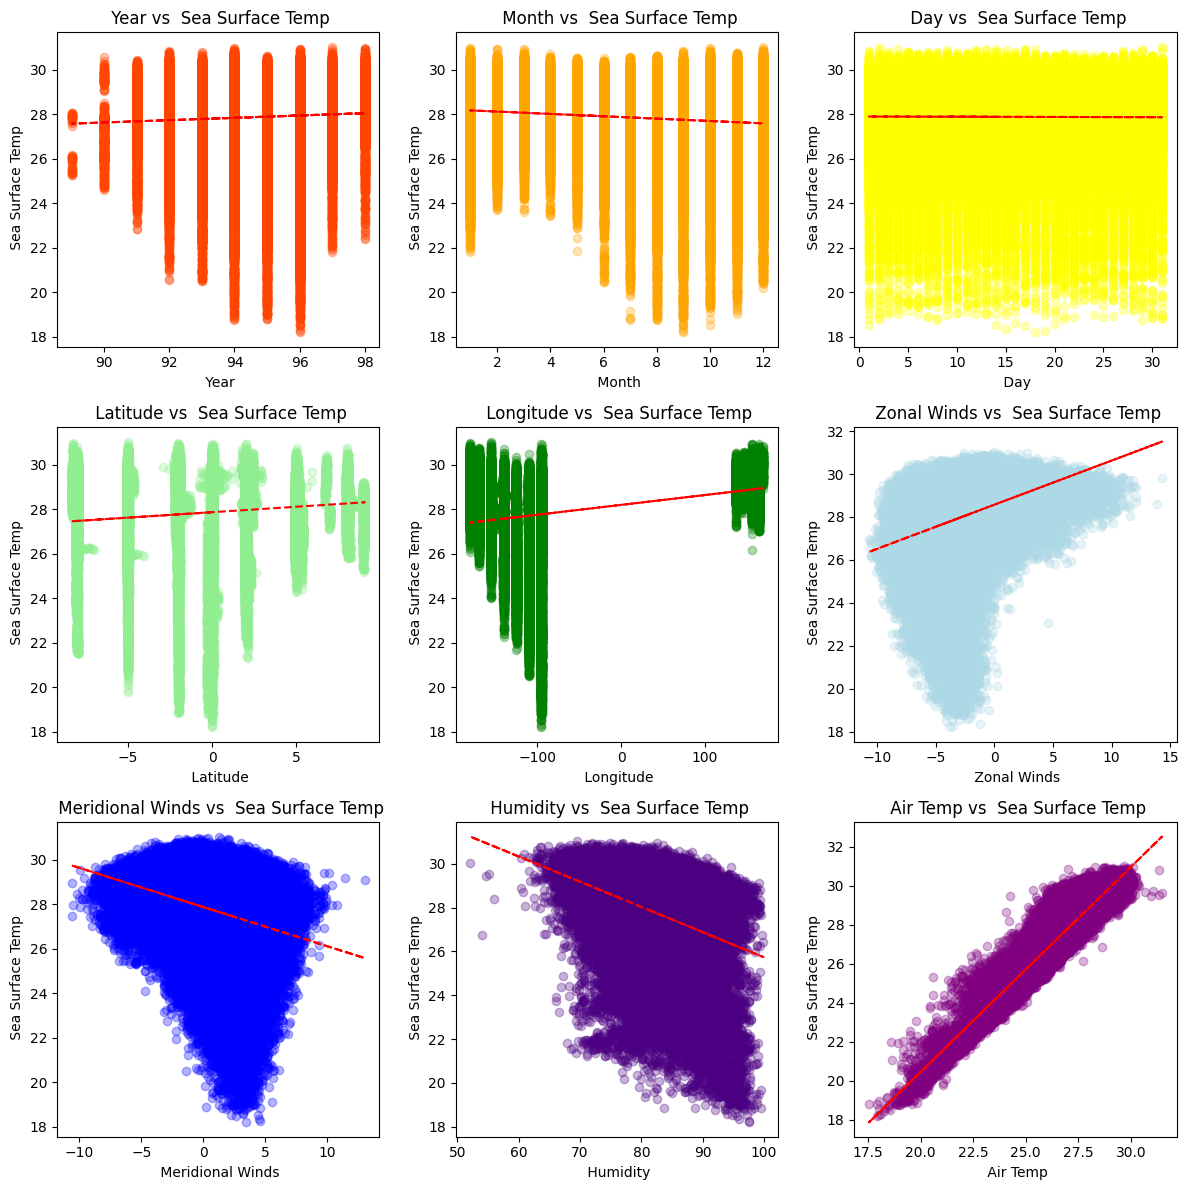

In [5]:
# Scatter plots para cada feature em relação ao target:

fig, axs = plt.subplots(3,3,figsize = (12,12))
axs = axs.flatten()
cores = ['orangered', 'orange', 'yellow', 'lightgreen', 'green', 'lightblue', 'blue', 'indigo', 'purple']
for (i, ax), cor in zip(enumerate(axs), cores):
    x = list(df[FEATURES[i]])
    y = list(df[TARGET[0]])

    pf = np.polyfit(x, y, 1)
    p = np.poly1d(pf)

    ax.scatter(x, y, color=cor, alpha=0.3)
    ax.plot(x, p(x), 'r--')

    ax.set_title(FEATURES[i] + ' vs ' + TARGET[0])
    ax.set_xlabel(FEATURES[i])
    ax.set_ylabel(TARGET[0])

plt.tight_layout()
plt.show()

<p "text-align: justify"> Após essa análise inicial, iremos utilizar de conceitos estátisticos como a Matriz de Correlação para analisar o comportamento dos dados. Ela  apresenta um tipo de análise estatística que identifica  visualmente  as  variáveis  envolvidas  no estudo,  assim  como  a  maneira  com  que  elas  se  relacionamentre si, caracterizando a força e a direção das variáveis, sendo o coeficiente que identifica essas informações, denominado de coeficiente de correlação que apresenta variação entre -1 e +1. Em  situações  que  as  variáveis  aumentam  ou  diminuem juntas,  o  valor  de  correlação  é  positivo, em contrapartida, elas  aumentam  ou  diminuem  de  maneira  oposta,  o  valor  de correlação é negativo.</p>

In [6]:
# Matriz de correlação:

df_correlacao = df.corr()

print('Matriz de correlação:')
df_correlacao

Matriz de correlação:


,Year,Month,Day,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
Year,1.000000,-0.186230,-0.016503,0.022339,-0.034951,0.026287,-0.085108,-0.011785,0.055755,0.053689
Month,-0.186230,1.000000,0.013974,-0.001173,-0.008976,0.063149,0.265413,-0.132518,-0.134154,-0.098813
Day,-0.016503,0.013974,1.000000,-0.001630,-0.002007,0.005034,0.005668,-0.000252,-0.007448,-0.004826
Latitude,0.022339,-0.001173,-0.001630,1.000000,0.096651,0.117911,-0.092178,0.158111,0.076123,0.125119
Longitude,-0.034951,-0.008976,-0.002007,0.096651,1.000000,0.364256,-0.024335,-0.042777,0.249050,0.304027
Zonal Winds,0.026287,0.063149,0.005034,0.117911,0.364256,1.000000,0.079763,0.063553,0.233156,0.376015
Meridional Winds,-0.085108,0.265413,0.005668,-0.092178,-0.024335,0.079763,1.000000,0.077647,-0.339254,-0.284897
Humidity,-0.011785,-0.132518,-0.000252,0.158111,-0.042777,0.063553,0.077647,1.000000,-0.388059,-0.324348
Air Temp,0.055755,-0.134154,-0.007448,0.076123,0.249050,0.233156,-0.339254,-0.388059,1.000000,0.940233
Sea Surface Temp,0.053689,-0.098813,-0.004826,0.125119,0.304027,0.376015,-0.284897,-0.324348,0.940233,1.000000


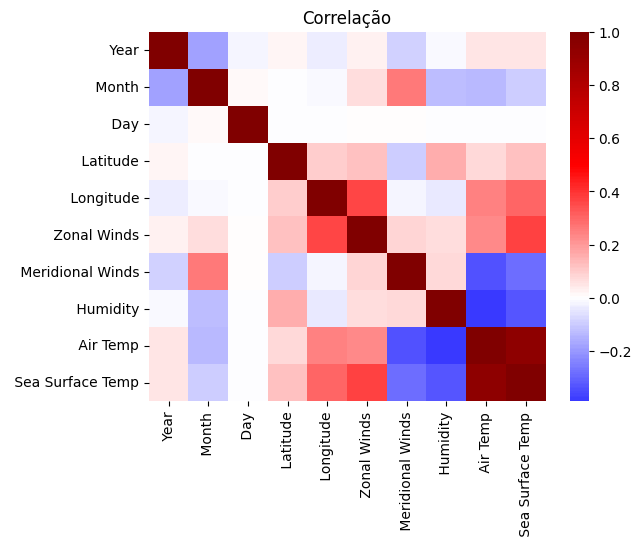

In [7]:
# Criando um mapa de cores dos valores da correlação:

sns.heatmap(df_correlacao,
        xticklabels=df_correlacao.columns,
        yticklabels=df_correlacao.columns,
        cmap='seismic',
        center = 0)

plt.title('Correlação')
plt.show()

<h5 "text-align: justify"> <b> Análise: </b> </h5>
<p "text-align: justify">  Na Matriz de Correlação, a coluna de 'Sea Surface Temp' é uma coluna de interesse para análise, pois conseguimos observar as relações de correlação positiva e negativa. No caso da correlação positiva, há uma indicação de que as variáveis estão crescendo na mesma direção, ou seja, à medida que o valor de uma variável aumenta, o valor da outra variável também tende a aumentar e esse comportamento é visto no caso da variável 'Sea Surface Temp' em relação as variáveis 'Air Temp' e 'Zonal Winds', ou seja, a medida que há um aumento na temperatura da superfície marítima há um aumento na temperatura do ar e também uma maior presença de variabilidade zonal do vento no Pacífico.  </p>
<p "text-align: justify">  Por sua vez, a correlação negativa (próximo a -1) indica tendência de movimentação em direções opostas das variáveis. Desse modo, percebemos esse comportamento nas variáveis 'Sea Surface Temp' em relação as variáveis 'Humidity' e 'Meridional Winds', ou seja, quando a temperatura aumenta, o valor de humidade e a variabilidade meridiacional do vento são menores. </p>


### Tensorização dos dados de entrada

In [8]:
# Criando tensores:

x_treino = torch.tensor(x_treino, dtype=torch.float32)
y_treino = torch.tensor(y_treino, dtype=torch.float32)
x_teste = torch.tensor(x_teste, dtype=torch.float32)
y_teste = torch.tensor(y_teste, dtype=torch.float32)

In [9]:
# Checando os dados:

print(x_treino)
print()
print(y_treino)

tensor([[0.4444, 1.0000, 0.3000,  ..., 0.4110, 0.6862, 0.7207],
        [0.8889, 0.4545, 0.1667,  ..., 0.5169, 0.6130, 0.8314],
        [0.7778, 0.9091, 0.0000,  ..., 0.4195, 0.6841, 0.4884],
        ...,
        [0.4444, 0.3636, 0.4333,  ..., 0.3856, 0.7301, 0.6780],
        [0.8889, 0.6364, 0.0000,  ..., 0.3051, 0.6025, 0.7359],
        [0.3333, 0.4545, 0.9000,  ..., 0.4831, 0.6506, 0.5810]])

tensor([[0.8132],
        [0.8444],
        [0.4786],
        ...,
        [0.7121],
        [0.8444],
        [0.5377]])


### Criação da classe da rede neural e definição de outros parâmetros

In [10]:
# Criando a classe da rede neural:

class OS_MENININHOS(nn.Module):
    def __init__(
        self, num_dados_entrada, neuronios_c1, neuronios_c2, num_targets
    ):
        super().__init__()

        # Definindo as camadas da rede:

        self.camadas = nn.Sequential(
                    nn.Linear(num_dados_entrada, neuronios_c1),
                    nn.ReLU(),
                    nn.Linear(neuronios_c1, neuronios_c2),
                    nn.ReLU(),
                    nn.Linear(neuronios_c2, num_targets),
                )

    def forward(self, x):
        """ Esse é o método que executa a rede do pytorch."""
        x = self.camadas(x)
        return x

In [11]:
# Criando uma instância da rede:

NUM_DADOS_DE_ENTRADA = x_treino.shape[1]
NUM_DADOS_DE_SAIDA = y_treino.shape[1]
NEURONIOS_C1 = 150
NEURONIOS_C2 = 63

minha_redezinha = OS_MENININHOS(NUM_DADOS_DE_ENTRADA, NEURONIOS_C1, NEURONIOS_C2, NUM_DADOS_DE_SAIDA)

In [12]:
# Checando os parâmetros internos:

for p in minha_redezinha.parameters():
    print(p)

Parameter containing:
tensor([[ 0.2989,  0.3126,  0.3014,  ..., -0.3107,  0.1195, -0.1266],
        [ 0.1233, -0.2753, -0.1968,  ...,  0.1993, -0.1416,  0.0208],
        [ 0.2624,  0.3239,  0.2905,  ..., -0.2445, -0.1518, -0.3241],
        ...,
        [-0.1564, -0.1047,  0.1957,  ..., -0.1847,  0.3254,  0.1130],
        [ 0.1705,  0.2092,  0.1002,  ..., -0.0272,  0.0511,  0.0644],
        [-0.0720, -0.0357, -0.0303,  ...,  0.0517,  0.2826, -0.1430]],
       requires_grad=True)
Parameter containing:
tensor([-0.1310, -0.1666,  0.2912,  0.1921,  0.2516,  0.2497,  0.0064,  0.2759,
        -0.1314, -0.2623, -0.1745,  0.0458, -0.0173, -0.2146,  0.2341,  0.1723,
         0.2821,  0.2504, -0.1027, -0.0008,  0.2384,  0.3266,  0.2777, -0.2352,
         0.3226, -0.2641,  0.3252, -0.1792,  0.1201,  0.2630,  0.2588, -0.3217,
         0.0447, -0.0030,  0.3205,  0.2062, -0.2872, -0.0505,  0.1300, -0.2627,
        -0.1468, -0.1607, -0.1300,  0.1640, -0.1542, -0.2804,  0.2222,  0.2341,
         0.1961

In [13]:
# Primeiro teste de previsão (ruinzinha):

y_pred = minha_redezinha(x_treino)
y_pred

tensor([[0.2405],
        [0.2169],
        [0.2367],
        ...,
        [0.2040],
        [0.2114],
        [0.1962]], grad_fn=<AddmmBackward0>)

In [14]:
# Usando o otimizador (Adam):

TAXA_DE_APRENDIZADO = 0.001

# A função perda será o erro quadrático médio:
fn_perda = nn.MSELoss()

# O otimizador será o Adam, um tipo de descida do gradiente:
otimizador = optim.Adam(minha_redezinha.parameters(), lr=TAXA_DE_APRENDIZADO)

### Treino da rede neural:

In [15]:
# Treinando a rede:

# Colocando ela no "modo treino":
minha_redezinha.train()

NUM_EPOCAS = 1000

y_true = y_treino

for epoca in range(NUM_EPOCAS):
    # Forward pass:
    y_pred = minha_redezinha(x_treino)

    # Zero grad:
    otimizador.zero_grad()

    # Loss:
    loss = fn_perda(y_pred, y_true)

    # Backpropagation:
    loss.backward()

    # atualiza parâmetros
    otimizador.step()

    # Exibe o resultado:
    print(epoca, loss.data)

0 tensor(0.3193)
1 tensor(0.2525)
2 tensor(0.1928)
3 tensor(0.1412)
4 tensor(0.0991)
5 tensor(0.0669)
6 tensor(0.0441)
7 tensor(0.0304)
8 tensor(0.0253)
9 tensor(0.0278)
10 tensor(0.0352)
11 tensor(0.0437)
12 tensor(0.0500)
13 tensor(0.0527)
14 tensor(0.0516)
15 tensor(0.0477)
16 tensor(0.0423)
17 tensor(0.0364)
18 tensor(0.0309)
19 tensor(0.0266)
20 tensor(0.0237)
21 tensor(0.0221)
22 tensor(0.0217)
23 tensor(0.0220)
24 tensor(0.0229)
25 tensor(0.0238)
26 tensor(0.0246)
27 tensor(0.0251)
28 tensor(0.0252)
29 tensor(0.0248)
30 tensor(0.0240)
31 tensor(0.0229)
32 tensor(0.0217)
33 tensor(0.0205)
34 tensor(0.0193)
35 tensor(0.0184)
36 tensor(0.0177)
37 tensor(0.0173)
38 tensor(0.0171)
39 tensor(0.0170)
40 tensor(0.0171)
41 tensor(0.0171)
42 tensor(0.0170)
43 tensor(0.0167)
44 tensor(0.0163)
45 tensor(0.0158)
46 tensor(0.0152)
47 tensor(0.0146)
48 tensor(0.0140)
49 tensor(0.0135)
50 tensor(0.0131)
51 tensor(0.0127)
52 tensor(0.0125)
53 tensor(0.0122)
54 tensor(0.0119)
55 tensor(0.0116)
56

In [16]:
# Checando a performance da rede:

with torch.no_grad():
    y_true = normalizador_y.inverse_transform(y_treino)
    y_pred = minha_redezinha(x_treino)
    y_pred = normalizador_y.inverse_transform(y_pred)

for yt, yp in zip(y_true, y_pred):
    print(yt, yp)

A saída de streaming foi truncada nas últimas 5000 linhas.
[29.75999962] [29.67281038]
[28.73000002] [29.01936677]
[29.14999973] [29.14818527]
[29.63000007] [29.75121452]
[29.18000004] [29.16463569]
[29.26000035] [29.23853699]
[29.54999976] [29.58924318]
[27.43999979] [27.14167943]
[25.66999999] [26.31582576]
[29.78000008] [29.57343001]
[26.97000006] [27.0833332]
[28.17000014] [28.03556515]
[21.70000006] [22.19010785]
[25.28999966] [24.98932946]
[29.12000019] [29.60486795]
[27.6399998] [27.16923875]
[28.88999987] [29.63331727]
[28.63999986] [28.88669033]
[29.23000005] [29.53807669]
[28.67000017] [29.15669617]
[27.06000022] [26.82517691]
[26.82000005] [26.53292493]
[25.78999969] [26.64740388]
[27.77999996] [28.4523457]
[28.79999971] [29.41699091]
[29.23000005] [29.37662235]
[26.92000006] [26.98529471]
[28.93999987] [29.14326117]
[23.71999987] [23.84852885]
[28.96000034] [28.82903037]
[29.31000036] [29.68905554]
[25.53999967] [25.82887547]
[29.13999989] [28.31001025]
[26.42999988] [25.32

### Teste da rede

In [17]:
# Testando a rede:

# Colocando ela no "modo avaliação":
minha_redezinha.eval()

with torch.no_grad():
    y_true = normalizador_y.inverse_transform(y_teste)
    y_pred = minha_redezinha(x_teste)
    y_pred = normalizador_y.inverse_transform(y_pred)

for yt, yp in zip(y_true, y_pred):
    print(yt, yp)

A saída de streaming foi truncada nas últimas 5000 linhas.
[28.83999987] [28.80910803]
[27.82000011] [27.85580456]
[27.64999964] [28.10547753]
[29.08000004] [29.36136676]
[28.22999999] [28.65722003]
[29.3899999] [29.139368]
[28.03999982] [27.70684237]
[29.03999988] [29.58056378]
[28.5999997] [27.78627284]
[29.29999974] [29.39658298]
[28.79999971] [28.73973026]
[28.48999985] [28.04748515]
[28.57000016] [28.95021801]
[28.83999987] [29.2564687]
[29.93999993] [29.81372122]
[29.58000007] [29.33872617]
[28.48999985] [28.81490604]
[24.28999998] [24.64541927]
[28.93999987] [29.73467755]
[27.66000026] [27.37168205]
[30.03000009] [30.29301615]
[26.65000035] [26.79626267]
[30.2499998] [30.14689399]
[25.77999984] [25.8470002]
[27.64999964] [27.62116507]
[29.68999992] [29.30326409]
[29.26000035] [28.83353704]
[28.21000029] [28.19600617]
[28.83999987] [27.87791666]
[29.48999991] [29.01300198]
[28.84999972] [28.92550944]
[30.25999965] [29.91905203]
[27.39999963] [27.20918606]
[27.47000009] [27.624562

<h3 "text-align: justify"> <b> Métricas de Desempenho </h3> </b>
<p "text-align: justify"> Em  redes  neurais,  as  métricas  de  desempenho  podem ser  caracterizadas como  indicadores  do  comportamento  de eficiência de  um  modelo.   Neste  artigo,  iremos  abordar três métricas  de  eficiência  da  previsão  do modelo  desenvolvido, sendo estas o Mean Absolute Error (MAE), Mean Absolute Percentage  Error (MAPE) e  o  Root  Mean  Square  Error(RMSE),  com  a finalidade  analisar  o  comportamento  do modelo após seu treinamento. </p>

<h3 "text-align: justify"> <b> Root Mean Square Error (RMSE) </b> </h3>

<p "text-align: justify"> Calcula a magnitude média  de  erro  em  previsões  quantitativas.   É  semelhante  à distância normalizada entre os vetor que definem os valores previstos e os vetores observados/reais dos dados. </p>



In [18]:
# Medindo a performance com RMSE:

RMSE = mean_squared_error(y_true, y_pred, squared=False)
print(f'RMSE - Loss do teste: {RMSE}')

RMSE - Loss do teste: 0.4269500361856619


<h5 "text-align: justify"> <b> Análise: </b> </h5>

<p "text-align: justify">  Para nosso modelo,  o valor do RMSE foi de,aproximadamente,  0.4440,  ou seja,  tivemos um RMSE com valor  baixo,  o  que  é algo  bom,  uma  vez  que  quanto  menor o  valor  de  RMSE,  melhor. Além  disso,  isso  mostra  que nosso modelo tem poucos outliers, isso pode ser constatado,novamente,  pelo  baixo  RMSE,  uma vez  que  o RMSE é afetado pelos outliers. </p>

<h3 "text-align: justify"> <b> Mean Absolute Percentage Error (MAPE) </b> </h3>

<p "text-align: justify"> Calcula a magnitude média  de  erro  em  previsões  quantitativas.   É  semelhante  à distância normalizada entre os vetor que definem os valores previstos e os vetores observados/reais dos dados. </p>


In [19]:
# Medindo a performance com MAPE:

target = torch.tensor(np.array(y_true))
pred = torch.tensor(np.array(y_pred))
MAPE = MeanAbsolutePercentageError()
print(f'MAPE - Loss do teste: {MAPE(pred, target)}')

MAPE - Loss do teste: 0.011714516207575798


<h5 "text-align: justify"> <b> Análise: </b> </h5>
<p "text-align: justify"> Para este trabalho,  o valor de MAPE encontrado de cerca de 1,215%. Ou seja, o valor previsto difere, em média, cerca de 1,215%do  valor  real,  tanto  pra  mais,  quanto  pra  menos. Nosso MAPE apresentou uma performance muito boa, especialmente, se  considerarmos  que  estamos  fazendo  previsões  climáticas da  temperatura  marítima  e  o  'El  Niño'  se  trata  de  uma teleconexão,  fazendo  com  que  ele  esteja  ligado  a  diversas regiões do planeta, de modo que dependa e influencie outros fatores  climáticos. Ou  seja,  caso  tivéssemos  mais  dados, poderíamos chegar a um MAPE ainda menor. </p>

<h3 "text-align: justify"> <b> Mean Absolute Error (MAE) </b> </h3>

<p "text-align: justify"> Calcula  a  média  das diferenças  absolutas  entre  os  valores  previstos  e  os  valores reais.   Essa  medida  é  um  score  linear,  o  que  significa  que todas as diferenças individuais contribuem igualmente para a medida.   Assim,  ela resulta em um tamanho aproximado da imprecisão, mas não da sua direção. </p>



In [20]:
# Medindo a performance com MAE:

MAE = nn.L1Loss()
print(f'MAE - Loss do teste: {MAE(pred, target)}')

MAE - Loss do teste: 0.3239610577926352


<h5 "text-align: justify"> <b> Análise: </b> </h5>
<p "text-align: justify"> Com  relação  ao  MAE,  para  nosso  modelo,  tivemos  um valor  de  0.336, sendo  este  a  média  entre  as  diferenças absolutas,  na  qual  todas  as  diferenças contribuem  para medida, temos um valor mediano de MAE. Por um lado, esse valor é bom, na perspectiva do número absoluto, uma vez que o valor previsto difere apenas 0.336 do valor real;  por outro lado,  ao aborda-lo no contexto do evento 'El Niño',  o valor pode estar próximo do valor mínimo devido a uma temperatura com variação de 0.5ºC, ou seja, a diferença real-previsto está muito  próxima  a  diferença  mínima  de  temperatura  que  está presente na água durante o 'El Niño'. </p>


<h5 "text-align: justify"> <b> Conclusão: </b> </h5>
<p "text-align: justify"> Embora  as  redes  neurais  artificiais  sejam  poderosas  em muitos aspectos,  devemos reconhecer que prever fenômenos naturais complexos é um desafio significativo.  A natureza é imprevisível e suas interações podem ser afetadas por fatores diversos, como a poluição que nós humanos causamos.  Esses fatores  podem  influenciar  a  ocorrência  e  a  intensidade  de eventos naturais, como o 'El Niño', de maneiras imprevisíveis e complicadas. Porém,   a  disponibilidade  de  bibliotecas  sofisticadas  eintuitivas facilita o desenvolvimento e a implementação desses modelos, poupando-nos do trabalho manual.   Essas bibliotecas fornecem uma ampla gama de funcionalidades  e  recursos,  permitindo  que  pesquisadores  e profissionais  utilizem  as  redes  neurais  artificiais  de  forma mais  acessível  e  eficaz, como observado pelo trabalho presente.   </p>
